In [1]:
from tqdm import tqdm
from crawler_tool import Batdongsan, crawl_batdongsan_by_url
import pymongo
from pymongo import InsertOne
from dotenv import load_dotenv
from seleniumbase import SB
import time
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import os
import math
load_dotenv(override=True)

connection_str = os.getenv('REALESTATE_DB')
__client = pymongo.MongoClient(connection_str)

database = 'realestate'
__database = __client[database]

collection = __database["realestate_url_pool"]

In [3]:
data = list(collection.find({}))

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,_id,crawl_at,url,source
0,66721d48a483ab60e9f38f2d,2024-06-18 23:50:32.500,https://batdongsan.com.vn/ban-dat-duong-ngo-ch...,batdongsan
1,66721d48a483ab60e9f38f2e,2024-06-18 23:50:32.500,https://batdongsan.com.vn/ban-dat-duong-tran-n...,batdongsan
2,66721d48a483ab60e9f38f2f,2024-06-18 23:50:32.500,https://batdongsan.com.vn/ban-dat-duong-hung-v...,batdongsan
3,66721d48a483ab60e9f38f30,2024-06-18 23:50:32.500,https://batdongsan.com.vn/ban-dat-duong-bui-hu...,batdongsan
4,66721d48a483ab60e9f38f31,2024-06-18 23:50:32.500,https://batdongsan.com.vn/ban-dat-duong-ba-die...,batdongsan
...,...,...,...,...
160793,6672ca28cad939acfd5adfd8,2024-06-19 12:08:08.287,https://batdongsan.com.vn/ban-nha-rieng-duong-...,batdongsan
160794,6672ca28cad939acfd5adfd9,2024-06-19 12:08:08.287,https://batdongsan.com.vn/ban-nha-rieng-duong-...,batdongsan
160795,6672ca28cad939acfd5adfda,2024-06-19 12:08:08.287,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,batdongsan
160796,6672ca28cad939acfd5adfdb,2024-06-19 12:08:08.287,https://batdongsan.com.vn/ban-nha-biet-thu-lie...,batdongsan


In [6]:
df.to_csv('./url_pool.csv')

In [9]:
unique_df = df.drop_duplicates(subset = ['url'], keep ='first')

In [12]:
num_dup = df.shape[0] - unique_df.shape[0]
num_uni = unique_df.shape[0]

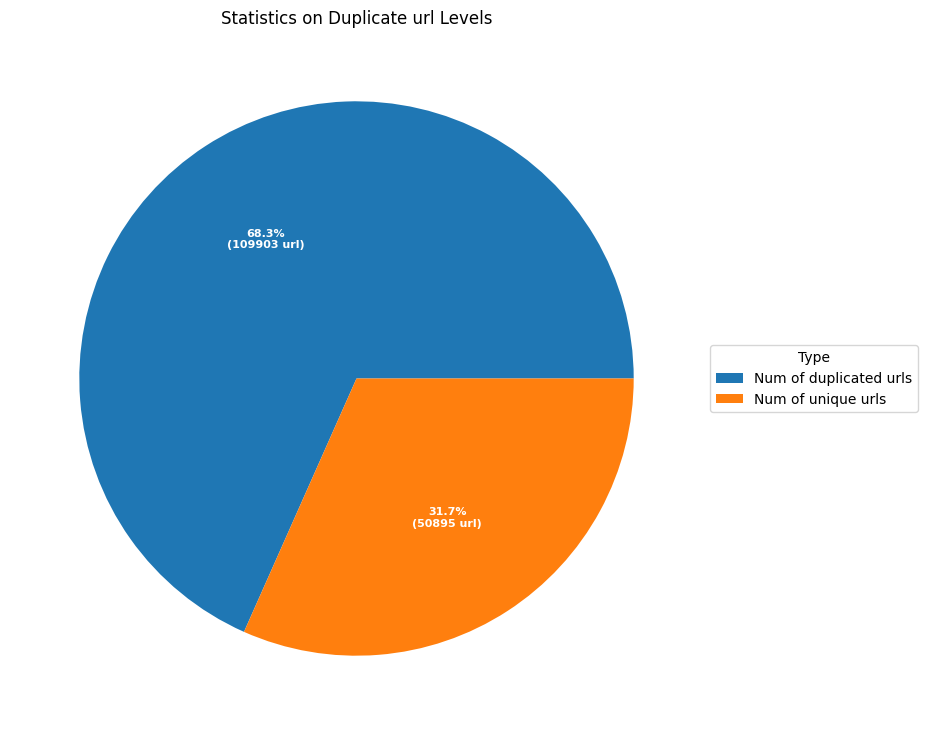

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(18, 9), subplot_kw=dict(aspect="equal"))

ingredients = ["Num of duplicated urls",
          "Num of unique urls"]

data = [num_dup, num_uni]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} url)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Statistics on Duplicate url Levels")

plt.show()

In [18]:
unique_df.reset_index(drop = True).to_csv('./url_pool.csv', index = False)